## EDA - TP Final: Telco

Analisis exploratorio de datos sobre el dataset

Alumnos: 
 * Sol Mazzeo - 
 * Jose Ignacio Jonte - 163414-8

In [1]:
#Importo las librerias necesarias para realizar el EDA.
import pandas as pd
import numpy as np
#Librerias para graficos
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_colwidth =80 #Me permite ver el diccionario sin truncarse
from sklearn.impute import SimpleImputer
sns.set_palette('pastel')
#ML
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
#Metricas
from sklearn.metrics import accuracy_score,roc_curve, auc,confusion_matrix
# Modelos
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [2]:
#Importo los db al notebook
bdtelco=pd.read_csv("telco_churn_clusterai.csv",index_col=0) #Pongo la columna de numeracion como indice. 
dicc=pd.read_excel('Diccionario_Telco.xlsx',usecols=[0,1],skiprows=[0]) #Elimino la columna que me indica la variable a predecir y la primera fila para tener los titulos 

##### Verifico que se hayan cargado correctamente y veo que tipo de datos tienen

In [3]:
bdtelco.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0.0,Yes,Yes,24.0,Yes,Yes,DSL,NaN,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,NaN,1990.5,No
7039,2234-XADUH,Female,0.0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0.0,Yes,Yes,11.0,No,No phone service,DSL,Yes,...,No,No,No,No,NaN,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1.0,Yes,No,NaN,NaN,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,NaN,74.40,306.6,Yes
7042,3186-AJIEK,NaN,0.0,NaN,No,66.0,NaN,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [4]:
dicc #Muestro el diccionario, que me permite entender las variables

,Variable,Significado
0,Customer ID,Valor identificador de clientes
1,gender,Género del cliente
2,SeniorCitizien,Si el cliente es un SeniorCitizien o no
3,Partner,Si el cliente tiene un socio o no
4,Dependents,Si el cliente tiene dependientes o no
5,tenure,Antigüedad del cliente
6,PhoneService,Si el cliente tiene un servicio de telefono o no
7,MultipleLines,Si el cliente tiene multiples lineas o no
8,InternetService,Tipo de servicio de internet que recibe. Si es que recibe
9,OnlineSecurity,Si el cliente tiene un servicio de seguridad online o no


In [5]:
bdtelco.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,6127,6127.000000,6127,6127,6127.000000,6127,6127,6127,6127,...,7043,7043,7043,7043,5846,5846,5846,5846.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3082,NaN,3172,4294,NaN,5527,2954,2683,3012,...,3095,3473,2810,2785,3218,3476,2001,NaN,11,5174
mean,NaN,NaN,0.161580,NaN,NaN,32.539742,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.658655,NaN,NaN
std,NaN,NaN,0.368095,NaN,NaN,24.629822,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.046041,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.700000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.400000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.375000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,56.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.687500,NaN,NaN


In [6]:
#Veo el tamaño del dataset principal y analizo como esta compuesto
np.shape(bdtelco)
print(f'El tamaño del dataset es de '+str(np.shape(bdtelco)[0]) + ' filas y ' +str(np.shape(bdtelco)[1]) + ' columnas') #Imprimo el resultado

El tamaño del dataset es de 7043 filas y 21 columnas


In [7]:
bdtelco.info(verbose=True) #Analizo los nulls que tiene cada feature, se observa que hay features con nulls

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            6127 non-null   object 
 2   SeniorCitizen     6127 non-null   float64
 3   Partner           6127 non-null   object 
 4   Dependents        6127 non-null   object 
 5   tenure            6127 non-null   float64
 6   PhoneService      6127 non-null   object 
 7   MultipleLines     6127 non-null   object 
 8   InternetService   6127 non-null   object 
 9   OnlineSecurity    6127 non-null   object 
 10  OnlineBackup      6127 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          5846 non-null   object 
 16  PaperlessBilling  5846 non-null   object 


In [8]:
#La columna TotalCharges esta como 'object' y por esa razon no funcionaba el .describe()
#Un error me dice que hay un error en la filla 488. Busco esa fila
bdtelco.iloc[488]
#Veo que hay un espacio en blanco que no cuenta como null. Busco agregar el null en los blanks asi los identifico.

customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                             0.0
Partner                                   Yes
Dependents                                Yes
tenure                                    0.0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [9]:
bdtelco=bdtelco.replace(r'^\s*$', np.nan, regex=True)
bdtelco.isnull().sum() #Ahora figuran los 11 nulls que tenian un espacio. Los droppeo

customerID             0
gender               916
SeniorCitizen        916
Partner              916
Dependents           916
tenure               916
PhoneService         916
MultipleLines        916
InternetService      916
OnlineSecurity       916
OnlineBackup         916
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract            1197
PaperlessBilling    1197
PaymentMethod       1197
MonthlyCharges      1197
TotalCharges          11
Churn                  0
dtype: int64

In [10]:
#Me quedo con el DB que no tiene valores nulos en totalcharges porque es un valor clave
bdtelco = bdtelco[bdtelco['TotalCharges'].notna()]
bdtelco.isnull().sum() #Elimno los nulls en TotalCharges

customerID             0
gender               916
SeniorCitizen        915
Partner              915
Dependents           914
tenure               915
PhoneService         914
MultipleLines        914
InternetService      914
OnlineSecurity       916
OnlineBackup         916
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract            1196
PaperlessBilling    1197
PaymentMethod       1194
MonthlyCharges      1196
TotalCharges           0
Churn                  0
dtype: int64

In [11]:
#Paso a float el total charge
bdtelco['TotalCharges'] = pd.to_numeric(bdtelco['TotalCharges'])

In [12]:
bdtelco.info() #Ya esta como float

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            6116 non-null   object 
 2   SeniorCitizen     6117 non-null   float64
 3   Partner           6117 non-null   object 
 4   Dependents        6118 non-null   object 
 5   tenure            6117 non-null   float64
 6   PhoneService      6118 non-null   object 
 7   MultipleLines     6118 non-null   object 
 8   InternetService   6118 non-null   object 
 9   OnlineSecurity    6116 non-null   object 
 10  OnlineBackup      6116 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          5836 non-null   object 
 16  PaperlessBilling  5835 non-null   object 


In [13]:
bd_sn=bdtelco.dropna()
np.shape(bd_sn) #Veo que si droppeo todos los nulls me qued con muy poca informacion en el DSet, por lo que debemos aplicar algun tipo
#De logica para poder llenar estos espacios en blanco.

(844, 21)

### Dealing with Nulls
Analizo segun cada feature como manejar el null


#### Gender

<AxesSubplot:xlabel='gender', ylabel='count'>

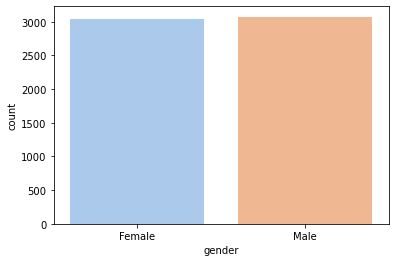

In [14]:
#Gender: Veo primero como esta distribuida la variable 
sns.countplot(data=bdtelco, x="gender")
#No hay una clara tendencia hacia un genero, exploro si hay correlacion con alguna otra variable

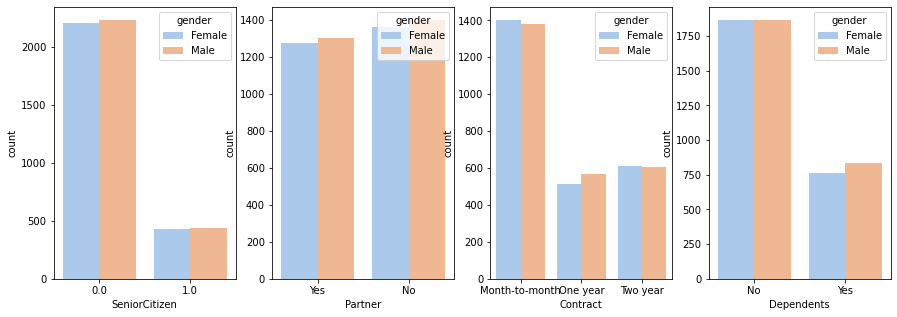

In [15]:
fig, ax = plt.subplots(nrows=1,ncols=4,figsize = (15, 5))
sns.countplot(data=bdtelco,x='SeniorCitizen',hue='gender',ax=ax[0])
sns.countplot(data=bdtelco,x='Partner',hue='gender',ax=ax[1])
sns.countplot(data=bdtelco,x='Contract',hue='gender',ax=ax[2])
sns.countplot(data=bdtelco,x='Dependents',hue='gender',ax=ax[3])
#Veo que no hay diferencia en el genero por otra variable categorica, asique decido llenar con el metodo 'filla'
bdtelco['gender']=bdtelco['gender'].ffill()

<AxesSubplot:xlabel='gender', ylabel='count'>

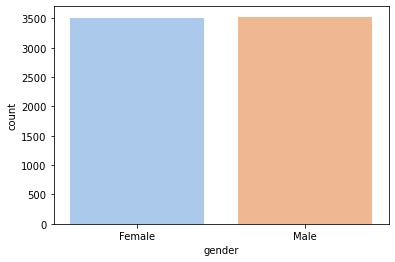

In [16]:
#Me aseguro que no haya cambiado intrinsecamente los datos
sns.countplot(data=bdtelco, x="gender")

#### Senior Citizen

In [17]:
#Ya tengo informacion que por genero no hay diferencia sustancial. 
bdtelco['SeniorCitizen']=bdtelco['SeniorCitizen'].bfill()
bdtelco['Partner']=bdtelco['Partner'].bfill()
bdtelco['Dependents']=bdtelco['Dependents'].bfill()
bdtelco['PhoneService']=bdtelco['PhoneService'].bfill()
bdtelco['MultipleLines']=bdtelco['MultipleLines'].ffill()
bdtelco['InternetService']=bdtelco['InternetService'].ffill()
bdtelco['OnlineSecurity']=bdtelco['OnlineSecurity'].bfill()
bdtelco['OnlineBackup']=bdtelco['OnlineBackup'].ffill()
bdtelco['PaperlessBilling']=bdtelco['PaperlessBilling'].ffill()
bdtelco['PaymentMethod']=bdtelco['PaymentMethod'].ffill()

### Tipo de contrato
Lleno el tipo de contrato relacionandolo con el valor mas frecuente en cierto rango de Total Charge. Si el total charge es menor a x valor, completo con la categoria mas frecuente en ese grupo

In [18]:
tot_m = bdtelco.loc[bdtelco['TotalCharges'] <= 1500]
tot_m.Contract.value_counts() #Los total charges menores a 1500 son en su mayoria month to month

Month-to-month    2168
Two year           447
One year           416
Name: Contract, dtype: int64

In [19]:
#Completo el contract con el valor mas frecuente para los total charges menores a 1500.
bdtelco.loc[bdtelco['TotalCharges'] <= 1500] = (bdtelco.loc[bdtelco['TotalCharges'] <= 1500].fillna(bdtelco.loc[bdtelco['TotalCharges'] <= 1500].Contract.mode()))
tot_mnew=bdtelco.loc[bdtelco['TotalCharges'] <= 1500]

In [20]:
tot_mnew.Contract.value_counts() #Corroboro que se hayan llenado los valores

Month-to-month    2168
Two year           447
One year           416
Name: Contract, dtype: int64

In [21]:
tot_3000 = bdtelco.loc[(bdtelco['TotalCharges'] > 3000)]
tot_3000.Contract.value_counts() #Los total charges mayores a 3000 son en su mayoria 

Two year          766
One year          572
Month-to-month    499
Name: Contract, dtype: int64

In [22]:
tot_3000.Contract.isnull().sum()

367

In [23]:
bdtelco.loc[bdtelco['TotalCharges'] >= 3000] = (bdtelco.loc[bdtelco['TotalCharges'] >= 3000].fillna(bdtelco.loc[bdtelco['TotalCharges'] >= 3000].Contract.mode()))

In [24]:
#Por ultimo completo el resto de los valores con el valor mas comun entre 1500 y 3000 (One year)
bdtelco.Contract = bdtelco.Contract.fillna(bdtelco.Contract.mode().iloc[0])

In [25]:
bdtelco.Contract.isnull().sum()

0

## Monthly Charges y tenure
El monthly charges esta realcionado con el total charges / el tenure. Esto da el pago por mes promedio que hicieron durante la susbscripcion. Esto lo vimos al ver la relacion lineal entre tenure y total charge al momento en el EDA.
Cabe aclarar que esta relacion no es exacta, pero es un buen estimador para poder llenar aquellos valores nulos

In [26]:
bdtelco['MonthlyCharges']=bdtelco['MonthlyCharges'].fillna(bdtelco['TotalCharges']/bdtelco['tenure']) #Lleno el nulo con la division de total / meses
bdtelco['MonthlyCharges'].isnull().sum() #De 1196 quedaron unicamente 157. 

157

In [27]:
#Con la misma logica puedo aplicarlo ahora para el tenure. Haciendo total charges /monthly charges
bdtelco['tenure']=bdtelco['tenure'].fillna(bdtelco['TotalCharges']/bdtelco['MonthlyCharges']) #Lleno el nulo con la division de total / meses
bdtelco['tenure'].isnull().sum()


157

In [28]:
bdtelco.dropna(inplace=True) #De esta manera recupero gran parte de los samples numericos del dataset de una manera logica.

In [29]:
bdtelco

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,5575-GNVDE,Male,0.0,No,No,34.000000,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,55.573529,1889.50,No
2,3668-QPYBK,Male,0.0,No,No,2.000000,No,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.850000,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,43.516548,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300000,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.000000,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.825000,151.65,Yes
5,9305-CDSKC,Female,0.0,No,No,8.000000,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.650000,820.50,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7036,7750-EYXWZ,Female,0.0,No,No,12.000000,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,Month-to-month,No,Electronic check,61.941667,743.30,No
7037,2569-WGERO,Female,0.0,Yes,No,72.000000,Yes,No,DSL,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.150000,1419.40,No
7038,6840-RESVB,Male,0.0,Yes,Yes,24.000000,Yes,Yes,DSL,No,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,82.937500,1990.50,No
7039,2234-XADUH,Female,0.0,Yes,Yes,72.000000,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.90,No


## EDA

Una vez termiando de imputar los valores nulls y dropeando los NAN, podemos hacer nuevamente (debido a que se hizo parte en este analisis) un analisis exploratorio de datos para entender particularidades de mis datos

<AxesSubplot:xlabel='Churn', ylabel='count'>

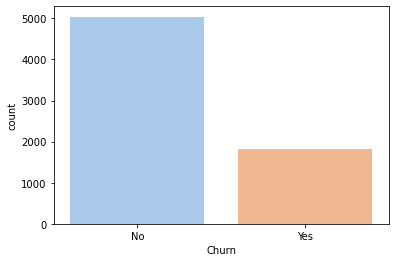

In [30]:
#Cantidad de clientes que dejaron el servicio:
sns.countplot(data=bdtelco, x="Churn")

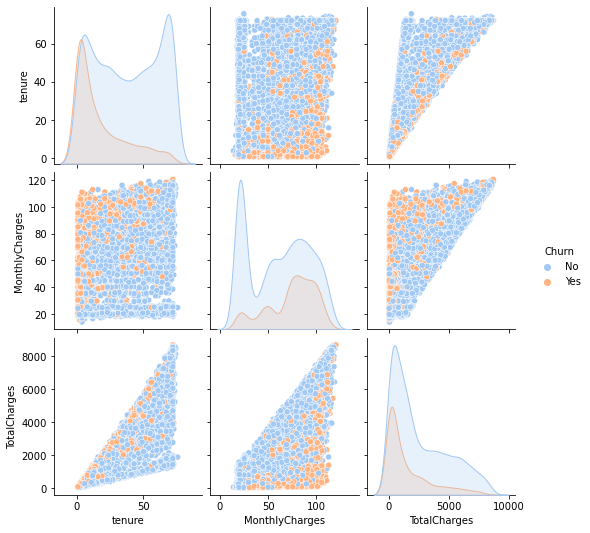

In [31]:
#Vemos si las variables continuas tienen alguna relacion con el 'Churn' del cliente
sns.pairplot(bdtelco,hue='Churn',vars=['tenure', 'MonthlyCharges', 'TotalCharges'])

In [32]:
#Veo a con los graficos que: 1) La mayor cantidad de Churn esta en los monthly charges mas altos con menor antigueda.
#2) Si bien hay algunos churn en montos bajos mensuales y tenure alto, parece que es un sector de usuarios mas consolidado

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

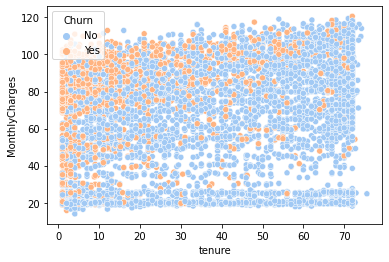

In [33]:
#Para ver la relacion con mas claridad
sns.scatterplot(x='tenure',y='MonthlyCharges',data=bdtelco,hue='Churn') #Creo el scatterplot
#Se puede obserbar que las suscpriciones de mas de 70 dolares son las que tienen mayor churn, mientras que las de 20 serian las mas estables

<Figure size 360x720 with 0 Axes>

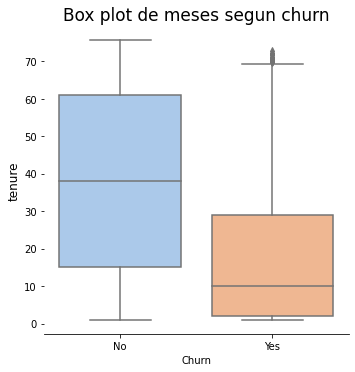

In [34]:
plt.figure(figsize=(5,10))
box2=sns.catplot(y='tenure',x='Churn',data=bdtelco,kind='box')
box2.despine(left=True) #Saca eje vertical
plt.title('Box plot de meses segun churn',size=17)
plt.ylabel('tenure',size=12)
plt.show()

In [35]:
#Como comentamos en el pairplor, hay algunos valores outliers de churn en clientes de mucha antiguedad

<Figure size 360x720 with 0 Axes>

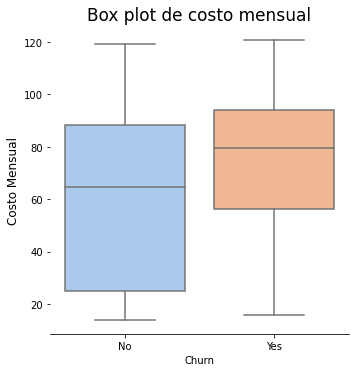

In [36]:
plt.figure(figsize=(5,10))
box2=sns.catplot(y='MonthlyCharges',x='Churn',data=bdtelco,kind='box')
box2.despine(left=True) #Saca eje vertical
plt.title('Box plot de costo mensual',size=17)
plt.ylabel('Costo Mensual',size=12)
plt.show()

In [37]:
#Busco en que bandas de precios hay mayor churn
bdtelco.loc[(bdtelco['MonthlyCharges'] > 0) & (bdtelco['MonthlyCharges'] <= 35), 'Banda'] = 'Menor a 35'
bdtelco.loc[(bdtelco['MonthlyCharges'] > 35) & (bdtelco['MonthlyCharges'] <= 70), 'Banda'] = 'Entre 35 y 70'
bdtelco.loc[(bdtelco['MonthlyCharges'] > 70), 'Banda'] = 'Mayor a 70'

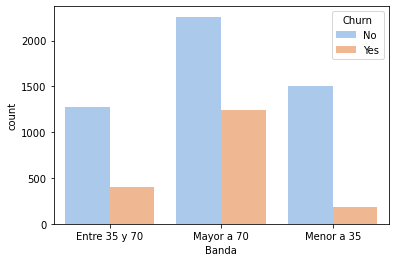

In [38]:
sns.countplot(data=bdtelco,x='Banda',hue='Churn') #Countplot de outcome en texto por rango etario. 
plt.show() #En suscripciones mayores a 70 el porcentaje de clientes que se da de baja es mucho mas alto

 Tambien se puede hacer un analisis sobre las variables categoricas. Del analisis de nulos ya sabemos que el genero no es una variable categorica de importancia, por lo que no centraremos el analisis en ella. Una variable interesante a tener en cuenta son las suscripciones del tipo 'Senion Citizen'

<Figure size 360x720 with 0 Axes>

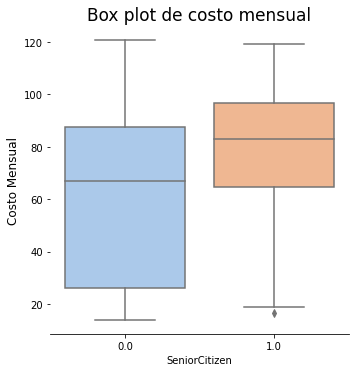

In [39]:
plt.figure(figsize=(5,10))
box2=sns.catplot(y='MonthlyCharges',x='SeniorCitizen',data=bdtelco,kind='box')
box2.despine(left=True) #Saca eje vertical
plt.title('Box plot de costo mensual',size=17)
plt.ylabel('Costo Mensual',size=12)
plt.show()
#Los usuario senior citizen tienen un costo mensual mas elevado que los usuarios comunes. Ademas el rango de precios que pagan los 
#socios esta mas concentrado.
#Se puede ver que hay outliers en el costo mensual de los seriocitizen

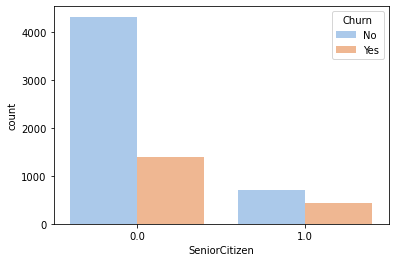

In [40]:
sns.countplot(data=bdtelco,x='SeniorCitizen',hue='Churn') 
plt.show() #Porcentualmente los usuarios con seniorcitizen tienen mas tasa de abandono.

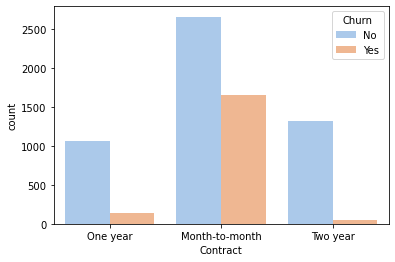

In [41]:
# Busco hacer el mismo analisis por el tipo de contrato
sns.countplot(data=bdtelco,x='Contract',hue='Churn') 
plt.show()
#El tipo de contrato resulta una de las variables categoricas mas importantes, la gran mayoria de los clientes que abandonan
#los clientes que se comprometen a mas largo plazo tienen muchas menos posibilidades de dejar la suscripcion.

Por ultimo una analisis por el tipo de servicio

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

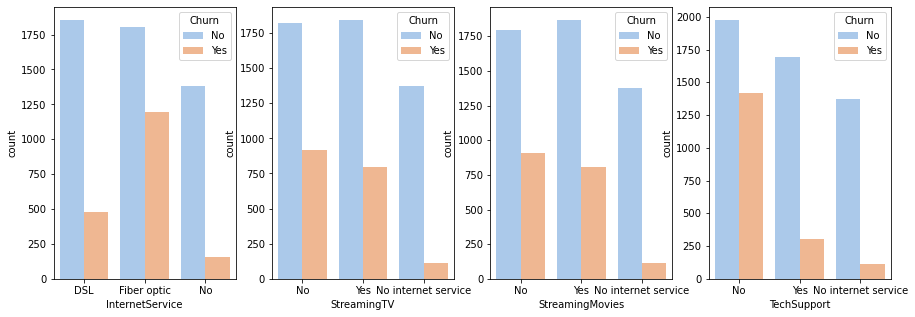

In [42]:
fig, ax = plt.subplots(nrows=1,ncols=4,figsize = (15, 5))
sns.countplot(data=bdtelco,x='InternetService',hue='Churn',ax=ax[0])
sns.countplot(data=bdtelco,x='StreamingTV',hue='Churn',ax=ax[1])
sns.countplot(data=bdtelco,x='StreamingMovies',hue='Churn',ax=ax[2])
sns.countplot(data=bdtelco,x='TechSupport',hue='Churn',ax=ax[3])
#El no tener servicio de internet parece ser otra variable categorica clave

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

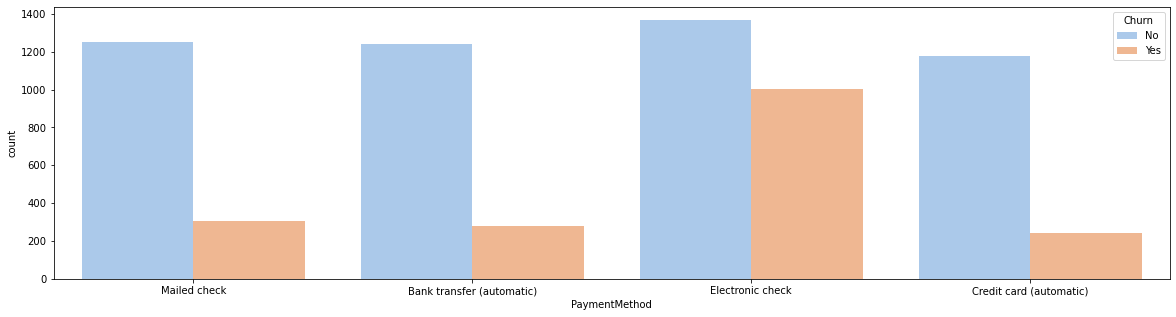

In [43]:
fig, ax = plt.subplots(figsize = (20, 5))
sns.countplot(data=bdtelco,x='PaymentMethod',hue='Churn')

In [44]:
#El pago electronico tiene ligeramente mayor cantidad de usuarios y mas poercentaje de Churn

### Conclusiones del EDA

* Nos permitio encontrar la relacion entre Total Charges y Tenure para poder completar los valores nulls de Monthly Charge
* Se observa una relacion entre los clinetes que abandonan la suscripcion y 
            a) El precio mensual: A menor precio menor probabilidad de abandono
            b) La antiguedad del cliente: A mayor antiguedad menor prob abandono.
* Dentro de las variables categoricas el tipo de contrato resulta una de las que mas relacion con el abandono de clientes tiene. A mayor plazo de contrato se reduce drasticamente la tasa de abandono.
* El tipo de internet service con fibra optica resulta el servicio con mayor % de abandono
* Por ultimo el tipo de pago con cheque electronico esta relacionado a la mayor tasa de abandono.

Encontramos outliers en Churn segun los meses y monthly charge segun senior citizen. En funcion de los resultados del modelo seleccionador veremos como interfieren en los resultados


# Pipeline de ML para prediccion de la variable Churn

Al tener los datos etiquetados puedo decir que es un problema de aprendizaje supervisado. La salida es categorica binaria por lo que puedo utilizar ademas de SVM, logistic regression.

Se hace el pipeline de desarollo:


In [45]:
bdtelco.drop('Banda', inplace=True, axis=1)
bdtelco.drop('customerID', inplace=True, axis=1)

In [46]:
# Definimos las variables de train y objetivo.
features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges','tenure']
target = ['Churn']
# Generamos X e Y
x = bdtelco.loc[:,features]
y = bdtelco.loc[:,target]

# Spliteamos Train y test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [47]:
x.head(2)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure
1,Male,0.0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,55.573529,1889.50,34.0
2,Male,0.0,No,No,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,53.850000,108.15,2.0


In [48]:
y.head(2)

,Churn
1,No
2,Yes


In [49]:
var_num=['MonthlyCharges','TotalCharges','tenure']
var_cat=['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']

In [50]:
# Definamos las transformaciones para cada tipo de variable:
transformacion_num_1 = Pipeline(
    steps=[("scaler", StandardScaler())]
)


transformacion_cat = OneHotEncoder(handle_unknown="error")

In [51]:
# Juntemos todo:
preprocesamiento = ColumnTransformer(transformers=[ ("num", transformacion_num_1, var_num),("cat", transformacion_cat, var_cat),])

In [52]:
pd.DataFrame(preprocesamiento.fit_transform(x_train))

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,1.002369,2.021225,1.623992,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.315267,0.664395,0.158862,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,-0.828416,-0.628292,-0.378730,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.186838,-0.976735,-1.277911,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.055354,-0.777381,-0.991808,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,-0.538819,-0.327724,-0.092627,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5493,1.148832,-0.540114,-0.869193,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5494,1.708724,2.699341,1.623992,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5495,-1.474184,-0.641085,0.397835,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [53]:
pipeline = Pipeline(
    steps=[("preprocesamiento", preprocesamiento), ("estimador", LogisticRegression())]
)

In [54]:
from sklearn import set_config
set_config(display="diagram")
pipeline

Pipeline(steps=[('preprocesamiento',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['MonthlyCharges',
                                                   'TotalCharges', 'tenure']),
                                                 ('cat', OneHotEncoder(),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('estimador', LogisticRegression())])

In [55]:
#Agregamos los hiperparametro y el modelo SVM
parametros = [
    {
        "estimador": (LogisticRegression(),),
          "estimador__C": (0.8,1,1.2)
    }, 
    {
        "estimador": (SVC(),),
          "estimador__kernel":('linear', 'rbf'), 
          "estimador__C":(1, 10, 100), 
          "estimador__gamma":(0.01, 0.1,1)          
    }
]

#Estos parametros se agregar al pipeline por el 'estimador'

In [56]:
from sklearn import set_config
set_config(display="diagram")
pipeline

Pipeline(steps=[('preprocesamiento',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['MonthlyCharges',
                                                   'TotalCharges', 'tenure']),
                                                 ('cat', OneHotEncoder(),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('estimador', LogisticRegression())])

In [57]:
#Creamos el GSCV para establecer el mejor modelo e hiperparametros
grid_search = GridSearchCV(pipeline, parametros,
                  refit = True, #Devuelve el modelo con los mejores parametros encontrados 
                   cv = 5, 
                   verbose=3)

In [58]:
grid_search.fit(x_train, y_train.values.ravel())

Fitting 5 folds for each of 21 candidates, totalling 105 fits
[CV 1/5] END estimador=LogisticRegression(), estimador__C=0.8;, score=0.795 total time=   0.0s
[CV 2/5] END estimador=LogisticRegression(), estimador__C=0.8;, score=0.788 total time=   0.0s
[CV 3/5] END estimador=LogisticRegression(), estimador__C=0.8;, score=0.813 total time=   0.0s
[CV 4/5] END estimador=LogisticRegression(), estimador__C=0.8;, score=0.789 total time=   0.0s
[CV 5/5] END estimador=LogisticRegression(), estimador__C=0.8;, score=0.805 total time=   0.0s
[CV 1/5] END estimador=LogisticRegression(), estimador__C=1;, score=0.794 total time=   0.0s
[CV 2/5] END estimador=LogisticRegression(), estimador__C=1;, score=0.787 total time=   0.0s
[CV 3/5] END estimador=LogisticRegression(), estimador__C=1;, score=0.813 total time=   0.0s
[CV 4/5] END estimador=LogisticRegression(), estimador__C=1;, score=0.789 total time=   0.0s
[CV 5/5] END estimador=LogisticRegression(), estimador__C=1;, score=0.805 total time=   0.0

[CV 5/5] END estimador=SVC(), estimador__C=10, estimador__gamma=1, estimador__kernel=linear;, score=0.799 total time=   1.2s
[CV 1/5] END estimador=SVC(), estimador__C=10, estimador__gamma=1, estimador__kernel=rbf;, score=0.756 total time=   1.2s
[CV 2/5] END estimador=SVC(), estimador__C=10, estimador__gamma=1, estimador__kernel=rbf;, score=0.745 total time=   1.2s
[CV 3/5] END estimador=SVC(), estimador__C=10, estimador__gamma=1, estimador__kernel=rbf;, score=0.747 total time=   1.2s
[CV 4/5] END estimador=SVC(), estimador__C=10, estimador__gamma=1, estimador__kernel=rbf;, score=0.750 total time=   1.2s
[CV 5/5] END estimador=SVC(), estimador__C=10, estimador__gamma=1, estimador__kernel=rbf;, score=0.763 total time=   1.4s
[CV 1/5] END estimador=SVC(), estimador__C=100, estimador__gamma=0.01, estimador__kernel=linear;, score=0.791 total time=   7.2s
[CV 2/5] END estimador=SVC(), estimador__C=100, estimador__gamma=0.01, estimador__kernel=linear;, score=0.791 total time=   7.6s
[CV 3/5

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocesamiento',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['MonthlyCharges',
                                                                          'TotalCharges',
                                                                          'tenure']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['gender',
                                                                          'SeniorCitizen',
                                                                          'Partner',
                                                                          'Dependents',
                                                                          'PhoneService',
                                                                          'MultipleLines',
                                                                          'InternetService',
                                                                          'OnlineSecurity',
                                                                          'OnlineBackup',
                                                                          'Dev...ion',
                                                                          'TechSupport',
                                                                          'StreamingTV',
                                                                          'StreamingMovies',
                                                                          'Contract',
                                                                          'PaperlessBilling',
                                                                          'PaymentMethod'])])),
                                       ('estimador', LogisticRegression())]),
             param_grid=[{'estimador': (LogisticRegression(C=0.8),),
                          'estimador__C': (0.8, 1, 1.2)},
                         {'estimador': (SVC(),), 'estimador__C': (1, 10, 100),
                          'estimador__gamma': (0.01, 0.1, 1),
                          'estimador__kernel': ('linear', 'rbf')}],
             verbose=3)

In [59]:
# Toda la informacion del entrenamiento esta en cv_results_
scores = grid_search.cv_results_
#Veamosla ...
scores_df = pd.DataFrame.from_dict(scores)
scores_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimador,param_estimador__C,param_estimador__gamma,param_estimador__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.043460,0.003708,0.006398,0.003199,LogisticRegression(C=0.8),0.8,NaN,NaN,"{'estimador': LogisticRegression(C=0.8), 'estimador__C': 0.8}",0.794545,0.788182,0.812557,0.788899,0.805278,0.797892,0.009550,1
1,0.045143,0.006992,0.008335,0.000675,LogisticRegression(C=0.8),1,NaN,NaN,"{'estimador': LogisticRegression(C=0.8), 'estimador__C': 1}",0.793636,0.787273,0.812557,0.788899,0.805278,0.797528,0.009805,3
2,0.049601,0.007838,0.006966,0.003540,LogisticRegression(C=0.8),1.2,NaN,NaN,"{'estimador': LogisticRegression(C=0.8), 'estimador__C': 1.2}",0.794545,0.787273,0.812557,0.788899,0.805278,0.797710,0.009739,2
3,0.476207,0.022952,0.053170,0.004854,SVC(),1,0.01,linear,"{'estimador': SVC(), 'estimador__C': 1, 'estimador__gamma': 0.01, 'estimador...",0.790000,0.790000,0.804368,0.789809,0.799818,0.794799,0.006127,5
4,0.492017,0.022195,0.247961,0.010291,SVC(),1,0.01,rbf,"{'estimador': SVC(), 'estimador__C': 1, 'estimador__gamma': 0.01, 'estimador...",0.784545,0.790909,0.808007,0.791629,0.797998,0.794618,0.007935,8


In [60]:
print("The best parameters are %s with a score of %0.2f" % (grid_search.best_params_, grid_search.best_score_))

The best parameters are {'estimador': LogisticRegression(C=0.8), 'estimador__C': 0.8} with a score of 0.80


In [61]:
#Vemos ahora que es lo que pasa cuando exponemos al modelo a los datos de test

#Primero tengo que usar el preprocesamiento aprendido para normalizar los xtest
pd.DataFrame(preprocesamiento.transform(x_test))

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,1.516653,2.360725,1.501376,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-1.457540,-0.909428,-0.910065,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.596268,-0.618421,-0.869193,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.651191,-0.721650,-1.032680,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,-1.507471,-0.910446,-0.861620,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1370,-0.442287,0.322571,1.092657,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1371,-1.504142,-0.389918,1.583120,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1372,-1.334378,-0.996964,-1.277911,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1373,0.381567,-0.513288,-0.746577,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [62]:
# Prediction sobre las muestras de test
y_pred = grid_search.predict(x_test)
print(y_pred) #La salida del modelo es correcta. Me indica si dejo ('yes') o no la compañia

['No' 'No' 'Yes' ... 'Yes' 'Yes' 'No']


### Resultados

In [63]:
# Computo el accuracy (comparar ytest vs ypred)
test_acc = accuracy_score(y_test, y_pred)
print("El accuracy es " + str(test_acc)) #Obtengo un 0.80 de acc

El accuracy es 0.8072727272727273


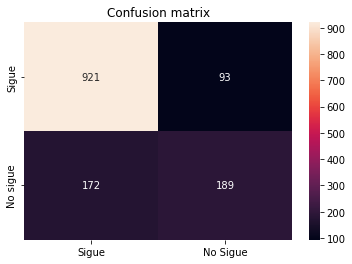

In [64]:
# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = ['Sigue', 'No sigue'], columns = ["Sigue",'No Sigue'])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True,fmt='g')
plt.title('Confusion matrix')
plt.show()

In [65]:
#EL modelo tiene mas falsos negativos, es decir usuarios que continuan con el plan y el modelo predijo que no lo harian.

### PCA


In [163]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.2, random_state=0)

In [175]:
from sklearn.decomposition import PCA
pca=PCA(n_components=1)

In [176]:
transformacion_num_2 = Pipeline(
    steps=[("scaler", StandardScaler()),("pca",pca)]
)

In [177]:
preprocesamiento2 = ColumnTransformer(transformers=[ ("num", transformacion_num_2, var_num),("cat", transformacion_cat, var_cat),])

In [178]:
pd.DataFrame(preprocesamiento2.fit_transform(x_train2))

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,2.752802,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.169531,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,-1.034504,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,-1.285137,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-1.053710,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,-0.531716,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5493,-0.296394,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5494,3.546195,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5495,-0.914820,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [179]:
pipeline2 = Pipeline(steps=[("preprocesamiento", preprocesamiento2),("estimador", LogisticRegression())])
from sklearn import set_config
set_config(display="diagram")
pipeline2
#Vemos como queda el pipeline ahora que agrego el PCA

Pipeline(steps=[('preprocesamiento',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=1))]),
                                                  ['MonthlyCharges',
                                                   'TotalCharges', 'tenure']),
                                                 ('cat', OneHotEncoder(),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('estimador', LogisticRegression())])

In [180]:
parametros2 = [
   {

        "estimador": (LogisticRegression(),),
          "estimador__C": (0.8,1,1.2)
    }, 
    {
        "estimador": (SVC(),),
          "estimador__kernel":('linear', 'rbf'), 
          "estimador__C":(1, 10, 100), 
          "estimador__gamma":(0.01, 0.1,1)          
    }
    ]

In [181]:
#Creamos el GSCV para establecer el mejor modelo e hiperparametros
grid_search2 = GridSearchCV(pipeline2, parametros2,
                  refit = True, #Devuelve el modelo con los mejores parametros encontrados 
                   cv = 5, 
                   verbose=3)

In [183]:
grid_search2.fit(x_train2, y_train2.values.ravel())

Fitting 5 folds for each of 21 candidates, totalling 105 fits
[CV 1/5] END estimador=LogisticRegression(), estimador__C=0.8;, score=0.792 total time=   0.0s
[CV 2/5] END estimador=LogisticRegression(), estimador__C=0.8;, score=0.790 total time=   0.0s
[CV 3/5] END estimador=LogisticRegression(), estimador__C=0.8;, score=0.799 total time=   0.0s
[CV 4/5] END estimador=LogisticRegression(), estimador__C=0.8;, score=0.789 total time=   0.0s
[CV 5/5] END estimador=LogisticRegression(), estimador__C=0.8;, score=0.797 total time=   0.0s
[CV 1/5] END estimador=LogisticRegression(), estimador__C=1;, score=0.792 total time=   0.0s
[CV 2/5] END estimador=LogisticRegression(), estimador__C=1;, score=0.790 total time=   0.0s
[CV 3/5] END estimador=LogisticRegression(), estimador__C=1;, score=0.799 total time=   0.0s
[CV 4/5] END estimador=LogisticRegression(), estimador__C=1;, score=0.788 total time=   0.0s
[CV 5/5] END estimador=LogisticRegression(), estimador__C=1;, score=0.797 total time=   0.0

[CV 5/5] END estimador=SVC(), estimador__C=10, estimador__gamma=1, estimador__kernel=linear;, score=0.798 total time=   1.3s
[CV 1/5] END estimador=SVC(), estimador__C=10, estimador__gamma=1, estimador__kernel=rbf;, score=0.756 total time=   1.7s
[CV 2/5] END estimador=SVC(), estimador__C=10, estimador__gamma=1, estimador__kernel=rbf;, score=0.744 total time=   1.5s
[CV 3/5] END estimador=SVC(), estimador__C=10, estimador__gamma=1, estimador__kernel=rbf;, score=0.753 total time=   1.6s
[CV 4/5] END estimador=SVC(), estimador__C=10, estimador__gamma=1, estimador__kernel=rbf;, score=0.749 total time=   1.3s
[CV 5/5] END estimador=SVC(), estimador__C=10, estimador__gamma=1, estimador__kernel=rbf;, score=0.758 total time=   1.4s
[CV 1/5] END estimador=SVC(), estimador__C=100, estimador__gamma=0.01, estimador__kernel=linear;, score=0.782 total time=   7.2s
[CV 2/5] END estimador=SVC(), estimador__C=100, estimador__gamma=0.01, estimador__kernel=linear;, score=0.786 total time=   6.9s
[CV 3/5

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocesamiento',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler()),
                                                                                         ('pca',
                                                                                          PCA(n_components=1))]),
                                                                         ['MonthlyCharges',
                                                                          'TotalCharges',
                                                                          'tenure']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['gender',
                                                                          'SeniorCitizen',
                                                                          'Partner',
                                                                          'Dependents',
                                                                          'PhoneService',
                                                                          'MultipleLines',
                                                                          'InternetService',
                                                                          'OnlineS...
                                                                          'DeviceProtection',
                                                                          'TechSupport',
                                                                          'StreamingTV',
                                                                          'StreamingMovies',
                                                                          'Contract',
                                                                          'PaperlessBilling',
                                                                          'PaymentMethod'])])),
                                       ('estimador', LogisticRegression())]),
             param_grid=[{'estimador': (LogisticRegression(C=0.8),),
                          'estimador__C': (0.8, 1, 1.2)},
                         {'estimador': (SVC(),), 'estimador__C': (1, 10, 100),
                          'estimador__gamma': (0.01, 0.1, 1),
                          'estimador__kernel': ('linear', 'rbf')}],
             verbose=3)

In [184]:
# Toda la informacion del entrenamiento esta en cv_results_
scores2 = grid_search2.cv_results_
#Veamosla ...
scores = pd.DataFrame.from_dict(scores2)
scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimador,param_estimador__C,param_estimador__gamma,param_estimador__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.038784,0.002560,0.006614,0.000808,LogisticRegression(C=0.8),0.8,NaN,NaN,"{'estimador': LogisticRegression(C=0.8), 'estimador__C': 0.8}",0.791818,0.790000,0.798908,0.788899,0.797088,0.793343,0.003956,1
1,0.038801,0.000982,0.007599,0.001016,LogisticRegression(C=0.8),1,NaN,NaN,"{'estimador': LogisticRegression(C=0.8), 'estimador__C': 1}",0.791818,0.790000,0.798908,0.787989,0.797088,0.793161,0.004171,2
2,0.041197,0.003187,0.007600,0.001020,LogisticRegression(C=0.8),1.2,NaN,NaN,"{'estimador': LogisticRegression(C=0.8), 'estimador__C': 1.2}",0.790909,0.790000,0.798908,0.787989,0.797088,0.792979,0.004245,3
3,0.439896,0.016889,0.051183,0.001180,SVC(),1,0.01,linear,"{'estimador': SVC(), 'estimador__C': 1, 'estimador__gamma': 0.01, 'estimador...",0.781818,0.786364,0.786169,0.791629,0.798908,0.788978,0.005859,13
4,0.426426,0.015775,0.209506,0.003339,SVC(),1,0.01,rbf,"{'estimador': SVC(), 'estimador__C': 1, 'estimador__gamma': 0.01, 'estimador...",0.790909,0.781818,0.801638,0.787989,0.795268,0.791525,0.006684,5


In [185]:
print("The best parameters are %s with a score of %0.2f" % (grid_search2.best_params_, grid_search2.best_score_))

The best parameters are {'estimador': LogisticRegression(C=0.8), 'estimador__C': 0.8} with a score of 0.79


In [189]:
pd.DataFrame(preprocesamiento2.transform(x_test2))

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,3.158208,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-1.828165,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,-0.616223,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,-0.751149,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,-1.825518,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1370,0.620931,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1371,-0.088998,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1372,-2.035663,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1373,-0.580662,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [190]:
y_pred3 = grid_search2.predict(x_test2)
print(y_pred3)

['No' 'No' 'Yes' ... 'No' 'Yes' 'No']


In [191]:
# Computo el accuracy (comparar ytest vs ypred)
test_acc = accuracy_score(y_test2, y_pred3)
print("El accuracy es " + str(test_acc)) #Obtengo un 0.80 de acc

El accuracy es 0.8123636363636364


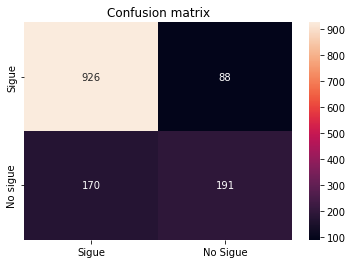

In [192]:
# Compute Confusion Matrix
cm = confusion_matrix(y_test2, y_pred3)
df_cm = pd.DataFrame(cm, index = ['Sigue', 'No sigue'], columns = ["Sigue",'No Sigue'])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True,fmt='g')
plt.title('Confusion matrix')
plt.show()